In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
data=pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
data.shape

(299, 13)

missinng value handling

In [8]:
data.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


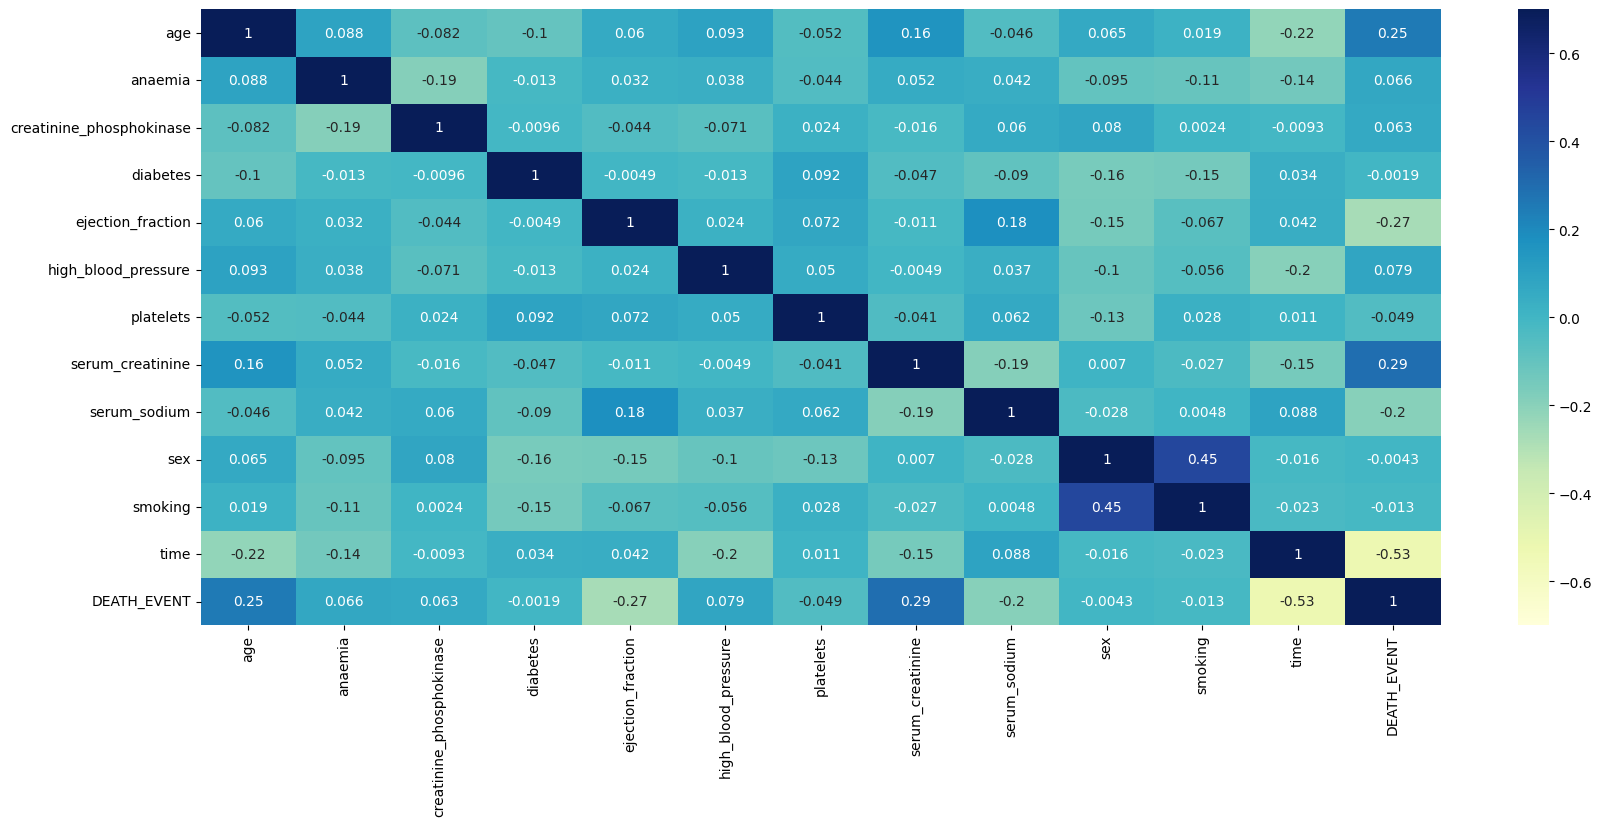

In [11]:
corrmatrix=data.corr() #assign correlation to corrmatrix
plt.subplots(figsize=(20,8)) #enlarges the fig
sns.heatmap(corrmatrix,annot=True,vmax=0.7,vmin=-0.7,cmap='YlGnBu')
plt.show()

In [13]:
data.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [14]:
y=data['DEATH_EVENT']
x=data.drop('DEATH_EVENT',axis=1)

In [17]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
scaler = StandardScaler() #standard scaling
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [30]:
log_reg=LogisticRegression()

In [31]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred_log=log_reg.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred_log)

0.7833333333333333

In [34]:
log_reg=LogisticRegression()   #using scaled data
log_reg.fit(x_train_sc,y_train)

LogisticRegression()

In [35]:
y_pred_log_sc=log_reg.predict(x_test_sc)
accuracy_score(y_test,y_pred_log_sc)

0.7833333333333333

In [36]:
y_predtr_log_sc=log_reg.predict(x_train_sc)
accuracy_score(y_train,y_predtr_log_sc)

0.8493723849372385

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up logistic regression with L2 penalty
log_reg = LogisticRegression(penalty='l2', solver='liblinear')

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best model and score
print("Best C:", grid_search.best_params_['C'])
print("Best cross-validated accuracy:", grid_search.best_score_)

Best C: 100
Best cross-validated accuracy: 0.8160460992907801


In [39]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test accuracy with tuned regularization:", test_accuracy)

Test accuracy with tuned regularization: 0.7833333333333333
